Setup

In [1]:
import pandas as pd
import numpy as np
import missingno as mno # needed to visualize missing values. install missingno into conda if import does not work!
import altair as alt
import seaborn as sns
import matplotlib.pyplot as plt
import time
import datetime
import warnings
import vegafusion as vf #also needs module vl-convert-python
from sklearn.model_selection import train_test_split

vf.enable()
warnings.simplefilter(action='ignore', category=FutureWarning)
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('vegafusion-inline')

Read Data

In [2]:
# Declare variables
data  = '..\\data\\'
# File names
top_songs_file = 'charts.csv'
million_songs_file = 'tracks_features.csv'
# Declare both dataframes
df_top_songs = pd.read_csv(data+top_songs_file)
df_million_songs = pd.read_csv(data+million_songs_file)

# Data Structure and preparation

In [3]:
df_top_songs

,track_id,name,country,date,position,streams,artists,artist_genres,duration,explicit
0,20IvMlpi4U5RuDnAlXSRiV,Crackküche,de,2021-04-15,82,625718,['Haftbefehl'],['german hip hop'],198746,False
1,0V1K6MU0utODk4yNqZKsFv,WATER,jp,2019-01-31,171,50896,['Suchmos'],"['japanese r&b', 'j-rock', 'japanese soul', 'j...",408320,False
2,4qzZm5EIdFurBpDieEmVc9,Gözleri Aşka Gülen,tr,2018-11-15,59,185439,['Nilipek.'],"['turkish singer-songwriter', 'turkish rock']",257142,False
3,4qzZm5EIdFurBpDieEmVc9,Gözleri Aşka Gülen,tr,2018-11-22,133,111159,['Nilipek.'],"['turkish singer-songwriter', 'turkish rock']",257142,False
4,4qzZm5EIdFurBpDieEmVc9,Gözleri Aşka Gülen,tr,2018-11-29,166,96204,['Nilipek.'],"['turkish singer-songwriter', 'turkish rock']",257142,False
...,...,...,...,...,...,...,...,...,...,...
5299303,7731grGgxDd7aBNpGOjm9k,När löven faller,se,2019-11-28,163,165644,['Ebbot Lundberg'],['swedish alternative rock'],252798,False
5299304,4Vm9XIi9AD1oK39xACmqk5,ワガママで誤魔化さないで,jp,2019-01-17,161,49580,['THE ORAL CIGARETTES'],"['j-poprock', 'anime', 'j-rock', 'japanese ind...",257270,False
5299305,4Vm9XIi9AD1oK39xACmqk5,ワガママで誤魔化さないで,jp,2019-01-24,139,56826,['THE ORAL CIGARETTES'],"['j-poprock', 'anime', 'j-rock', 'japanese ind...",257270,False
5299306,4Vm9XIi9AD1oK39xACmqk5,ワガママで誤魔化さないで,jp,2019-01-31,151,53897,['THE ORAL CIGARETTES'],"['j-poprock', 'anime', 'j-rock', 'japanese ind...",257270,False


In [4]:
df_top_songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5299308 entries, 0 to 5299307
Data columns (total 10 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   track_id       object
 1   name           object
 2   country        object
 3   date           object
 4   position       int64 
 5   streams        int64 
 6   artists        object
 7   artist_genres  object
 8   duration       int64 
 9   explicit       bool  
dtypes: bool(1), int64(3), object(6)
memory usage: 368.9+ MB


In [5]:
df_million_songs

,id,name,album,album_id,artists,artist_ids,track_number,disc_number,explicit,danceability,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year,release_date
0,7lmeHLHBe4nmXzuXc0HDjk,Testify,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],1,1,False,0.470,...,0.0727,0.02610,0.000011,0.3560,0.503,117.906,210133,4.0,1999,1999-11-02
1,1wsRitfRRtWyEapl0q22o8,Guerrilla Radio,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],2,1,True,0.599,...,0.1880,0.01290,0.000071,0.1550,0.489,103.680,206200,4.0,1999,1999-11-02
2,1hR0fIFK2qRG3f3RF70pb7,Calm Like a Bomb,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],3,1,False,0.315,...,0.4830,0.02340,0.000002,0.1220,0.370,149.749,298893,4.0,1999,1999-11-02
3,2lbASgTSoDO7MTuLAXlTW0,Mic Check,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],4,1,True,0.440,...,0.2370,0.16300,0.000004,0.1210,0.574,96.752,213640,4.0,1999,1999-11-02
4,1MQTmpYOZ6fcMQc56Hdo7T,Sleep Now In the Fire,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],5,1,False,0.426,...,0.0701,0.00162,0.105000,0.0789,0.539,127.059,205600,4.0,1999,1999-11-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204020,0EsMifwUmMfJZxzoMPXJKZ,Gospel of Juke,Notch - EP,38O5Ys0W9PFS5K7dMb7yKb,['FVLCRVM'],['7AjItKsRnEYRSiBt2OxK1y'],2,1,False,0.264,...,0.0672,0.00935,0.002240,0.3370,0.415,159.586,276213,4.0,2014,2014-01-09
1204021,2WSc2TB1CSJgGE0PEzVeiu,Prism Visions,Notch - EP,38O5Ys0W9PFS5K7dMb7yKb,['FVLCRVM'],['7AjItKsRnEYRSiBt2OxK1y'],3,1,False,0.796,...,0.0883,0.10400,0.644000,0.0749,0.781,121.980,363179,4.0,2014,2014-01-09
1204022,6iProIgUe3ETpO6UT0v5Hg,Tokyo 360,Notch - EP,38O5Ys0W9PFS5K7dMb7yKb,['FVLCRVM'],['7AjItKsRnEYRSiBt2OxK1y'],4,1,False,0.785,...,0.0564,0.03040,0.918000,0.0664,0.467,121.996,385335,4.0,2014,2014-01-09
1204023,37B4SXC8uoBsUyKCWnhPfX,Yummy!,Notch - EP,38O5Ys0W9PFS5K7dMb7yKb,['FVLCRVM'],['7AjItKsRnEYRSiBt2OxK1y'],5,1,False,0.665,...,0.0409,0.00007,0.776000,0.1170,0.227,124.986,324455,4.0,2014,2014-01-09


In [6]:
df_million_songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1204025 entries, 0 to 1204024
Data columns (total 24 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   id                1204025 non-null  object 
 1   name              1204025 non-null  object 
 2   album             1204025 non-null  object 
 3   album_id          1204025 non-null  object 
 4   artists           1204025 non-null  object 
 5   artist_ids        1204025 non-null  object 
 6   track_number      1204025 non-null  int64  
 7   disc_number       1204025 non-null  int64  
 8   explicit          1204025 non-null  bool   
 9   danceability      1204025 non-null  float64
 10  energy            1204025 non-null  float64
 11  key               1204025 non-null  int64  
 12  loudness          1204025 non-null  float64
 13  mode              1204025 non-null  int64  
 14  speechiness       1204025 non-null  float64
 15  acousticness      1204025 non-null  float64
 16  

Find top songs in million songs data

In [7]:
# Write first entry of artists back into the column 
# hoping that the first entry is always the main artist of the song found in the top song dataset
df_million_songs['artists'] = df_million_songs.artists.apply(lambda x: eval(x)[0])
# rename columns to join on
df_top_songs.rename(columns = {'track_id':'id'}, inplace = True)
# Add column to identify top songs and label with 1 if position <= 50
df_top_songs['top_song'] = 0
df_top_songs['top_song'][df_top_songs.position <= 50] = 1
# keep only columns to join on and top song column
df_top_songs = df_top_songs[['id','top_song','country','streams','position']]
# join on song name and artist performing
df_merged = pd.merge(df_top_songs,df_million_songs, on=['id'], how='inner')

# set all missing top song identifiers to 0 if not 1
# change column to category type
df_merged['top_song'] = df_merged['top_song'].astype('category')
# change time signature to category
df_merged['time_signature'] = df_merged['time_signature'].astype('int')
df_merged['time_signature'] = df_merged['time_signature'].astype('category')
# change mode to category
df_merged['mode'] = df_merged['mode'].astype('int')
df_merged['mode'] = df_merged['mode'].astype('category')
# change explicit to category
df_merged['explicit'] = df_merged['explicit'].astype('int')
df_merged['explicit'] = df_merged['explicit'].astype('category')
# change track number and disk number to category
df_merged['track_number'] = df_merged['track_number'].astype('category')
df_merged['disc_number'] = df_merged['disc_number'].astype('category')
# drop release date, artists id and album id column
df_merged = df_merged.drop(['release_date','album_id','artist_ids'], axis = 1)
# change remaining object types to category
for col in df_merged.columns:
    if df_merged[col].dtype == object:
        df_merged[col] = df_merged[col].astype('category')
# find duplicate songs by the same song id and remove them from the dataframe
duplicateRows = df_merged[df_merged.duplicated(['id'])]
df_merged = df_merged.drop(duplicateRows.index)

C:\Users\Nico\AppData\Local\Temp\ipykernel_18300\3543745041.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_songs['top_song'][df_top_songs.position <= 50] = 1


In [8]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4629 entries, 0 to 836471
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   id                4629 non-null   category
 1   top_song          4629 non-null   category
 2   country           4629 non-null   category
 3   streams           4629 non-null   int64   
 4   position          4629 non-null   int64   
 5   name              4629 non-null   category
 6   album             4629 non-null   category
 7   artists           4629 non-null   category
 8   track_number      4629 non-null   category
 9   disc_number       4629 non-null   category
 10  explicit          4629 non-null   category
 11  danceability      4629 non-null   float64 
 12  energy            4629 non-null   float64 
 13  key               4629 non-null   int64   
 14  loudness          4629 non-null   float64 
 15  mode              4629 non-null   category
 16  speechiness       4629

In [11]:
df_merged['top_song'].value_counts()

0    3831
1     798
Name: top_song, dtype: int64

In [12]:
# show values of mode column
df_merged['mode'].value_counts()

1    2660
0    1969
Name: mode, dtype: int64

In [13]:
# show values of time signature column
df_merged['time_signature'].value_counts()

4    4332
3     184
5      80
1      33
Name: time_signature, dtype: int64

Variable list and data splitting

In [15]:
# define outcome variable as y_label
y_label = 'top_song'
# select features
features = df_merged.drop(columns=[y_label]).columns.tolist()
# create feature data for data splitting
X = df_merged[features]
# create response for data splitting
y = df_merged[y_label]
# Data Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# data training set
df_train = pd.DataFrame(X_train.copy())
df_train = df_train.join(pd.DataFrame(y_train))

# Data Exploration

In [16]:
df_explore = df_train.copy()

list_num = df_explore.select_dtypes(include=[np.number]).columns.to_list()

Descriptive Statistics

In [17]:
df_explore.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
streams,3240.0,2102076.94,4226367.73,1057.00,63776.25,336324.50,1947543.25,53344093.00
position,3240.0,122.75,62.54,1.00,69.00,131.00,176.00,331.00
danceability,3240.0,0.66,0.16,0.07,0.56,0.67,0.77,0.98
energy,3240.0,0.64,0.18,0.01,0.53,0.66,0.78,1.00
key,3240.0,5.26,3.57,0.00,2.00,5.00,8.00,11.00
loudness,3240.0,-6.62,2.84,-36.85,-7.87,-6.14,-4.79,1.51
speechiness,3240.0,0.12,0.11,0.02,0.04,0.07,0.16,0.95
acousticness,3240.0,0.24,0.25,0.00,0.04,0.14,0.36,0.99
instrumentalness,3240.0,0.02,0.12,0.00,0.00,0.00,0.00,0.96
liveness,3240.0,0.18,0.14,0.02,0.10,0.12,0.21,0.99


In [18]:
q1 = df_explore.quantile(q = 0.25)
q3 = df_explore.quantile(q = 0.75)
iqr = q3-q1
iqr

streams             1.883767e+06
position            1.070000e+02
danceability        2.100000e-01
energy              2.490000e-01
key                 6.000000e+00
loudness            3.075000e+00
speechiness         1.207000e-01
acousticness        3.288000e-01
instrumentalness    1.100000e-04
liveness            1.136500e-01
valence             3.360000e-01
tempo               4.180125e+01
duration_ms         5.518300e+04
year                3.000000e+00
dtype: float64

In [19]:
# inspect correlation   
corr = df_merged.corr()
corr.style.background_gradient(cmap='Blues')

,streams,position,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,year
streams,1.000000,-0.347389,0.139588,-0.022918,-0.004465,0.055469,0.080318,-0.077452,-0.041832,-0.003234,-0.018116,0.007674,-0.065598,0.131616
position,-0.347389,1.000000,-0.138228,0.007379,0.001439,-0.029881,-0.050875,0.022188,0.030607,0.016664,0.011765,-0.021194,0.092688,-0.263910
danceability,0.139588,-0.138228,1.000000,0.115408,-0.021626,0.196627,0.246193,-0.237193,-0.171722,-0.076051,0.367896,-0.013548,-0.242591,0.228707
energy,-0.022918,0.007379,0.115408,1.000000,0.046071,0.748806,-0.001478,-0.586915,-0.097414,0.132993,0.381867,0.122379,0.047298,0.071512
key,-0.004465,0.001439,-0.021626,0.046071,1.000000,0.026484,-0.000618,-0.003184,0.014457,0.009011,0.010042,0.015432,0.024816,-0.000563
loudness,0.055469,-0.029881,0.196627,0.748806,0.026484,1.000000,-0.040743,-0.470246,-0.242359,0.066542,0.316330,0.103340,0.021049,0.232193
speechiness,0.080318,-0.050875,0.246193,-0.001478,-0.000618,-0.040743,1.000000,-0.068015,-0.103605,0.038049,0.051415,0.138209,-0.170708,0.194582
acousticness,-0.077452,0.022188,-0.237193,-0.586915,-0.003184,-0.470246,-0.068015,1.000000,0.081809,-0.043128,-0.139370,-0.104627,-0.030404,-0.125992
instrumentalness,-0.041832,0.030607,-0.171722,-0.097414,0.014457,-0.242359,-0.103605,0.081809,1.000000,-0.000763,-0.146538,-0.020073,0.136424,-0.029474
liveness,-0.003234,0.016664,-0.076051,0.132993,0.009011,0.066542,0.038049,-0.043128,-0.000763,1.000000,0.036743,-0.025941,0.021085,-0.012732


[Text(0.5, 1.0, 'Multicolinearity Check')]

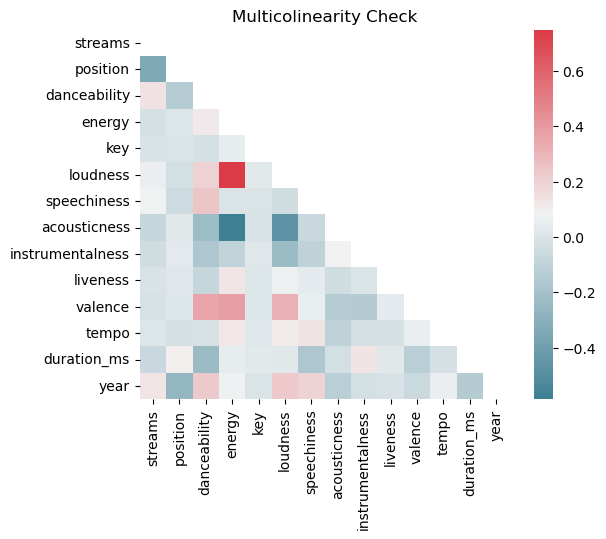

In [20]:
# visualize correlation matrix
# optimize aesthetics: generate mask for removing duplicate / unnecessary info
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
# Generate a custom diverging colormap as indicator for correlations:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Plot
sns.heatmap(corr, mask=mask, cmap=cmap, annot=False,  square=True, annot_kws={"size": 12}).set(title="Multicolinearity Check")

Visual analysis

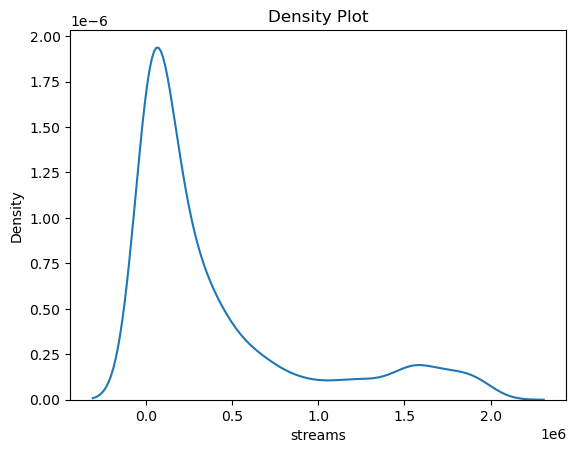

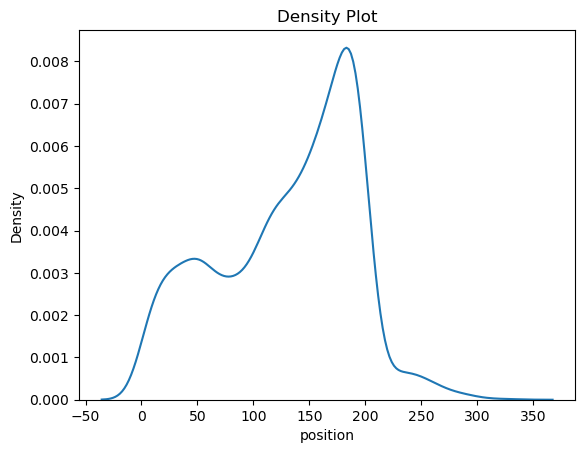

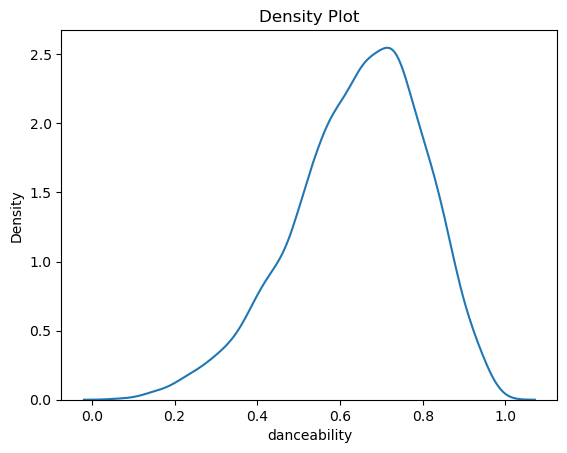

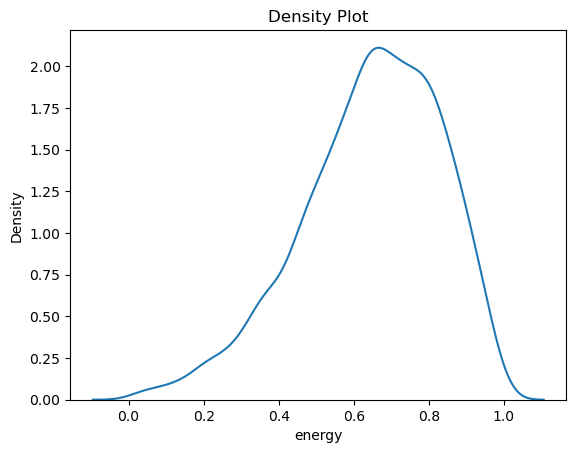

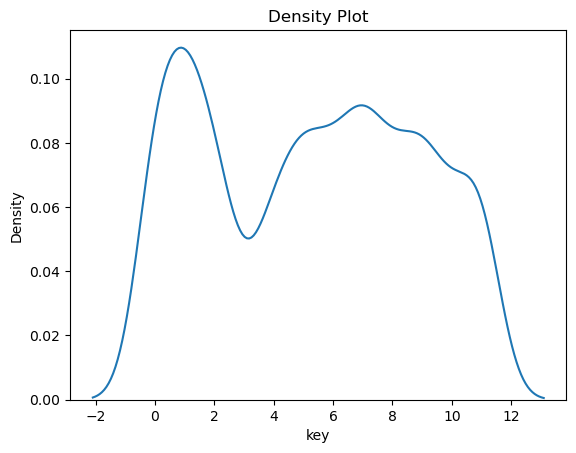

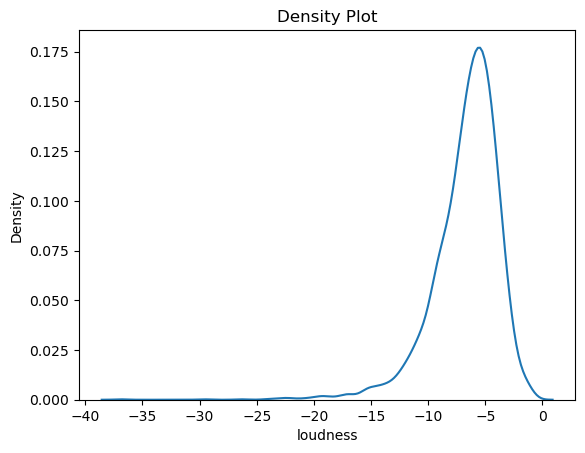

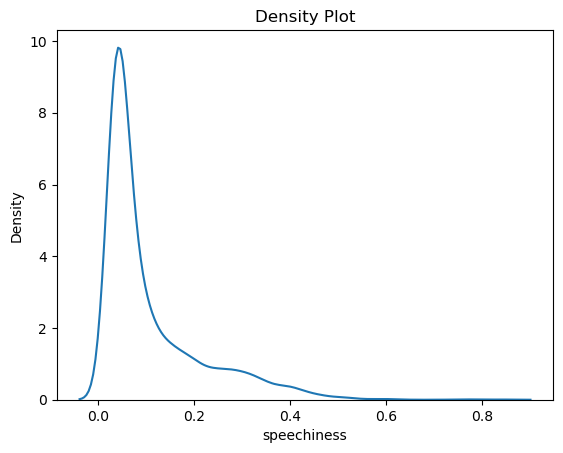

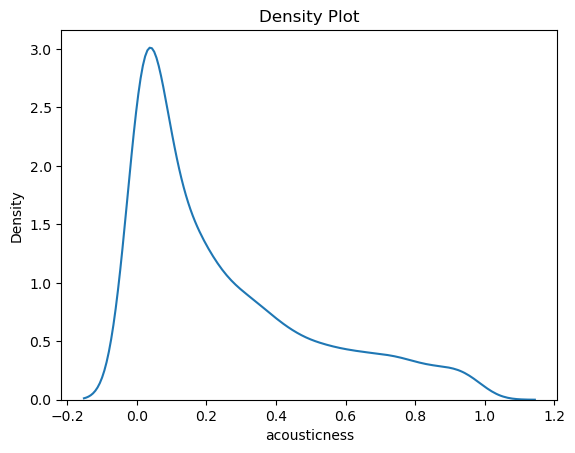

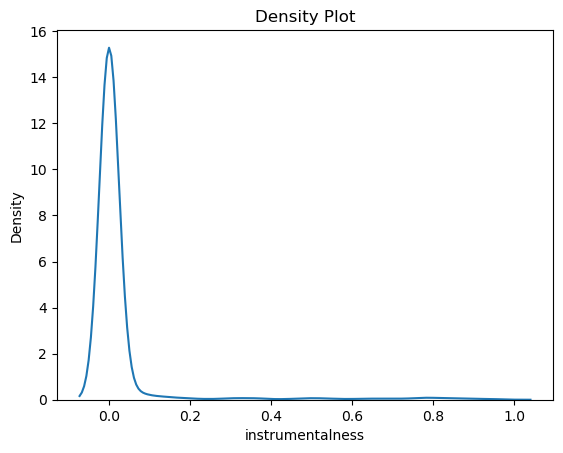

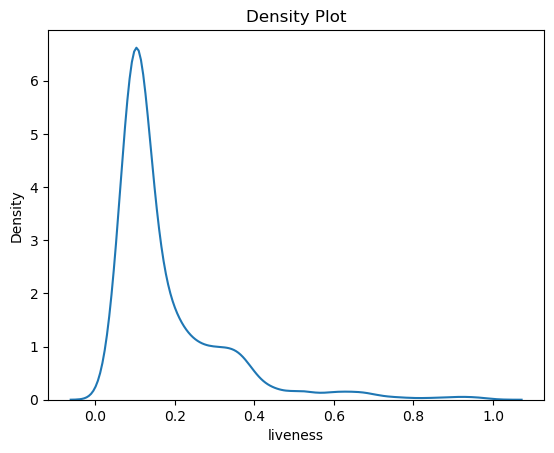

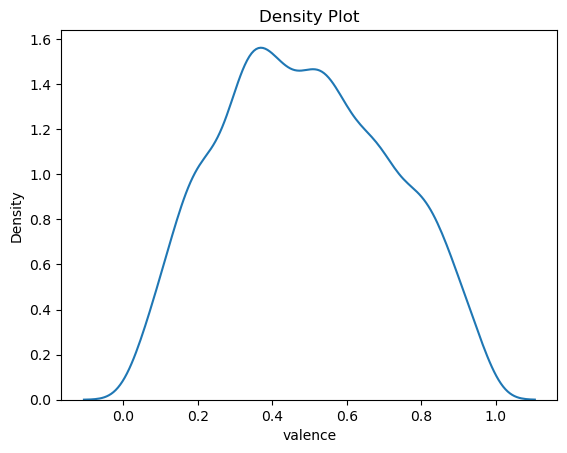

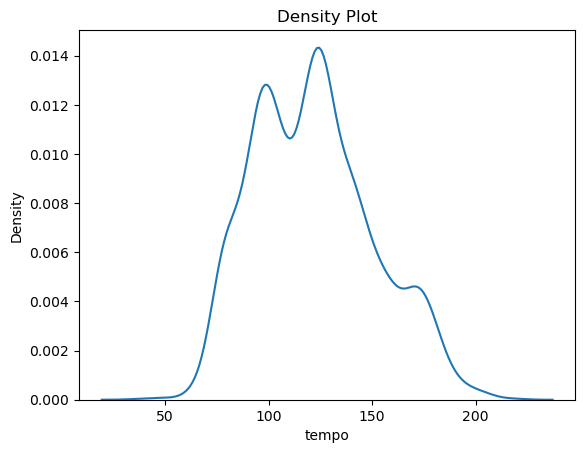

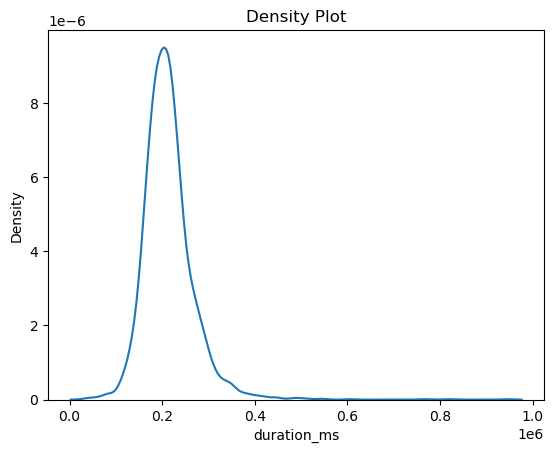

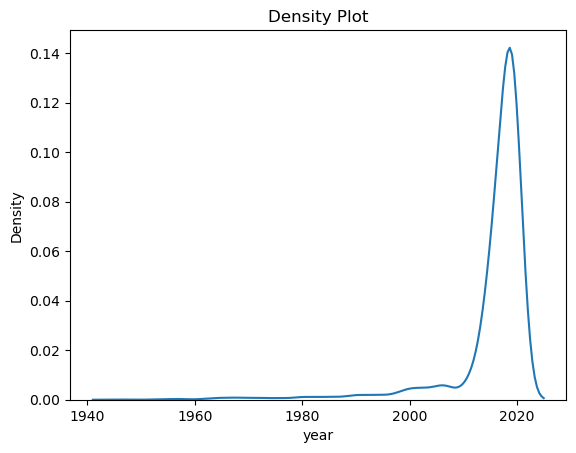

In [22]:
# Make a boxplot for every numerical variable in relation to top song label
def print_kde(df, x_var):
    df = df[(df['streams'] < 2000000)]


    ax = sns.kdeplot(data=df, 
            x=x_var
            )
    ax.set_title('Density Plot')
    ax.set_xlabel(x_var)
    plt.suptitle('')

for col in list_num:
    print_kde(df_merged, col)
    plt.show()


Top song classification analysis

In [24]:
# Stacked bar plots for categories mode and explicit in relation to top songs
mode = alt.Chart(df_merged).mark_bar().encode(
    x=alt.X('count(mode)', stack="normalize"),
    y='top_song',
    color='mode'
)
mode.title = 'Percentage of mode per top song'

explicit = alt.Chart(df_merged).mark_bar().encode(
    x=alt.X('count(explicit)', stack="normalize"),
    y='top_song',
    color='explicit'
)
explicit.title = 'Percentage of explicit per top song'

country = alt.Chart(df_merged).mark_bar().encode(
    x=alt.X('count(country)', stack="normalize"),
    y='top_song',
    color='country'
)
country.title = 'Percentage top song per country'

chart = alt.vconcat(mode, explicit, country)

chart

alt.VConcatChart(...)

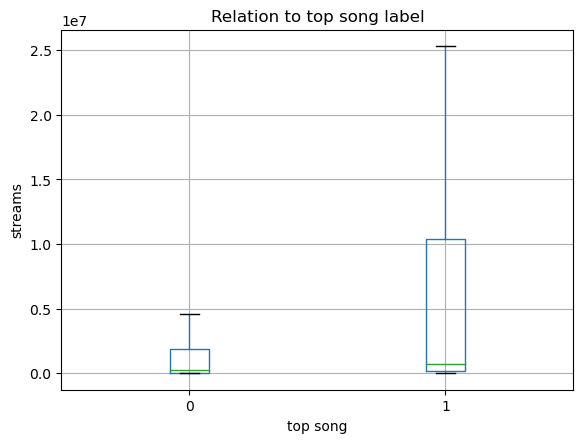

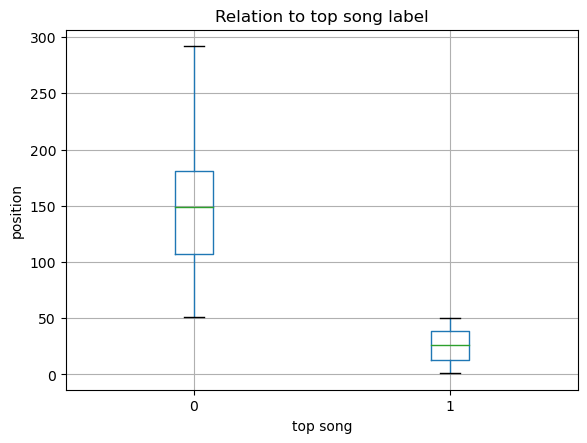

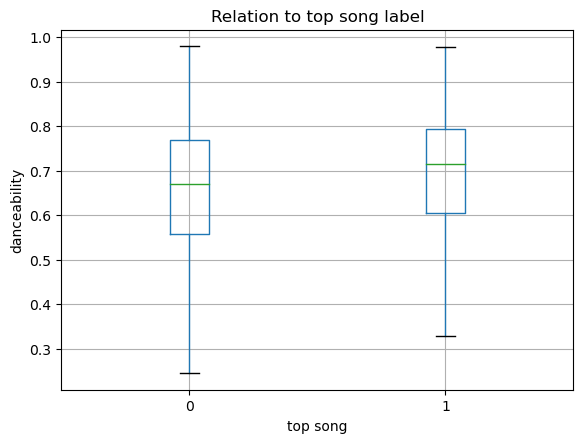

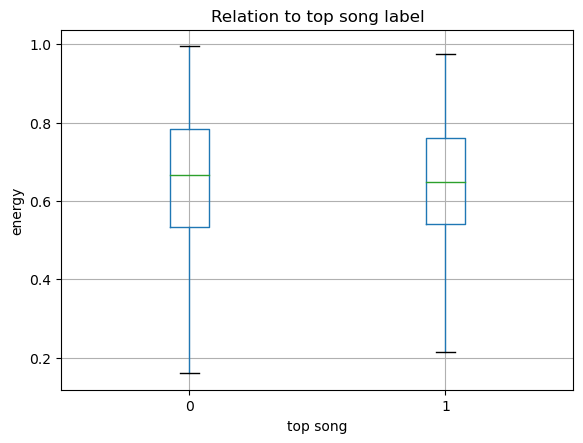

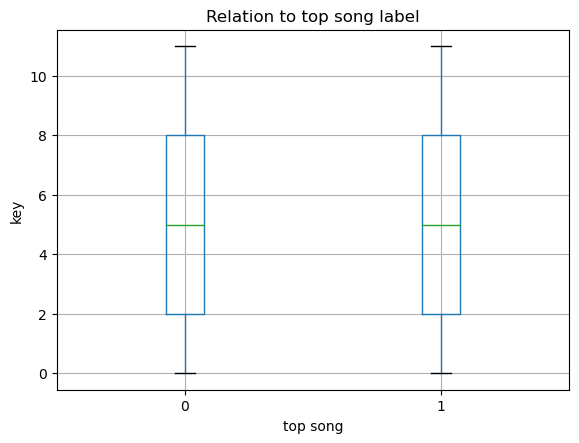

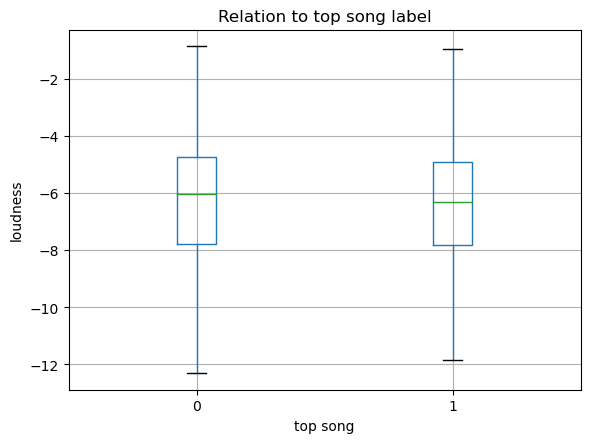

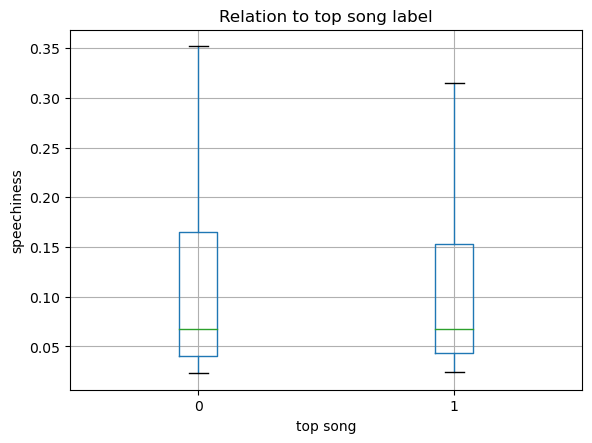

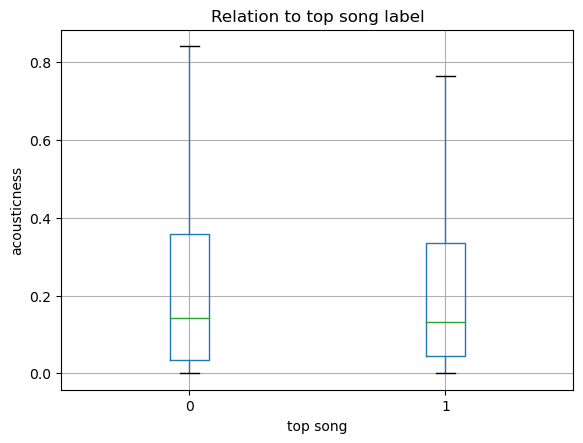

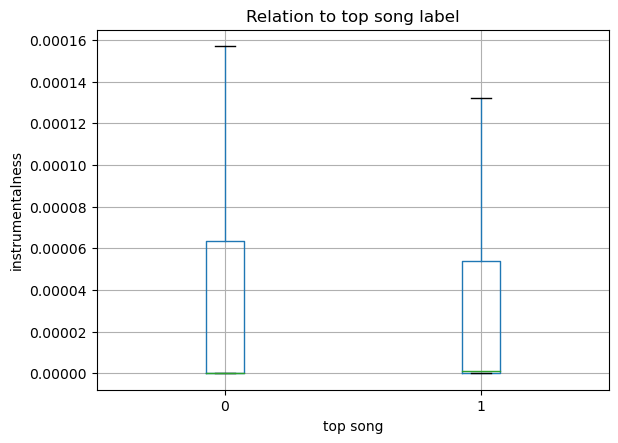

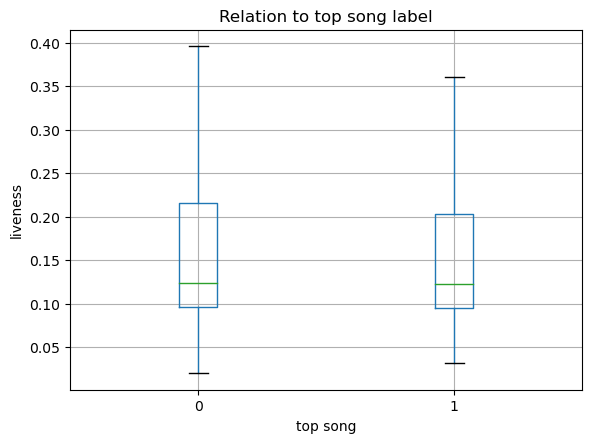

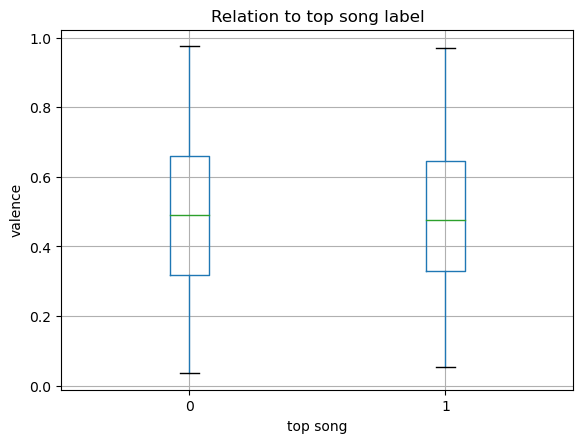

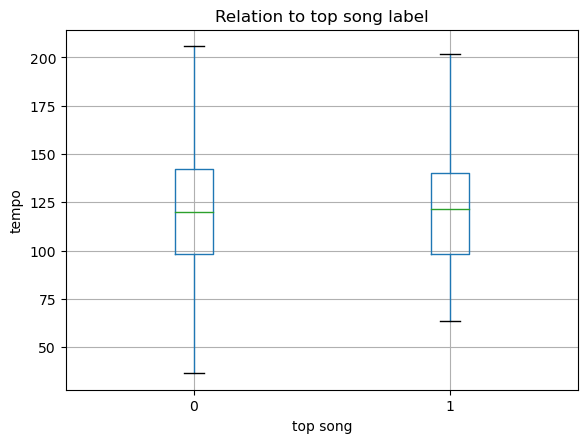

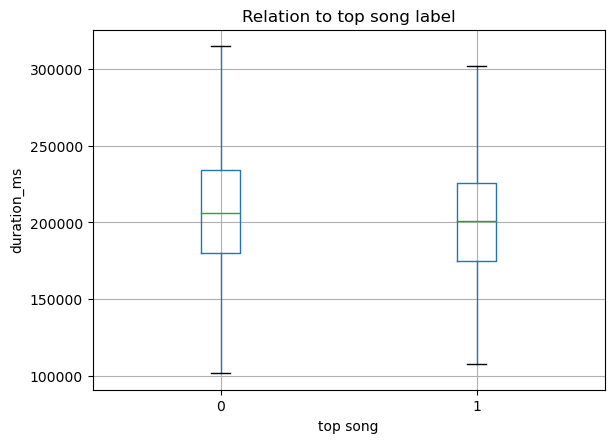

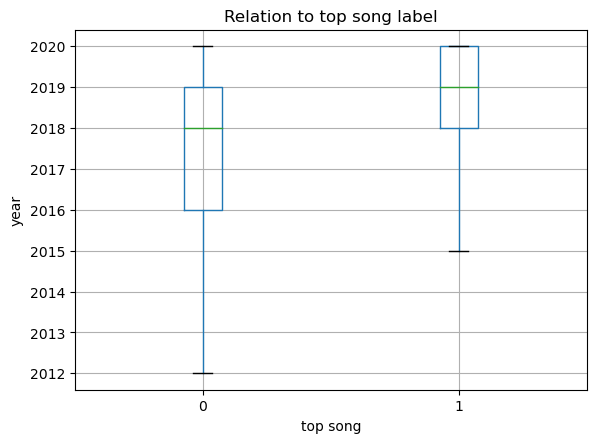

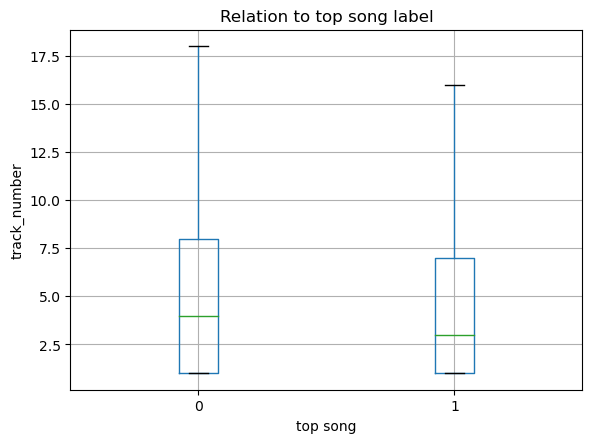

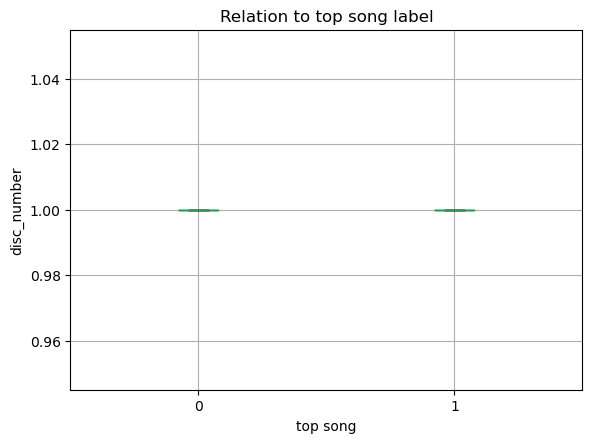

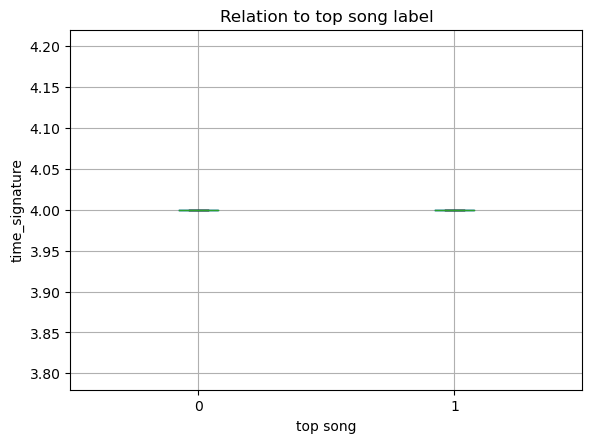

In [26]:
# Make a boxplot for every numerical variable in relation to top song label
def print_boxplot(df, y_var):
    df = df[(df['instrumentalness'] < 0.2)]
    
    ax = df.boxplot(column=y_var, by='top_song', showfliers=False)
    ax.set_title('Relation to top song label')
    ax.set_xlabel('top song')
    ax.set_ylabel(y_var)
    plt.suptitle('')

list_num.append('track_number')
list_num.append('disc_number')
list_num.append('time_signature')

for col in list_num:
    print_boxplot(df_merged, col)
    plt.show()


First Results

* remove columns with ids for model
* keep either year or release date for model
* standard scale for numerical values 
* no outliers (tempo needs to be checked more because values of 0 dont make sense)
* Energy and loudness have a strong positive correlation - drop one?
* Acousticness and energy as well as loudness correlate moderate to stron negatively - drop one / both?
* mode more 0 for top songs, relatively low difference (~10%)
* explicit more 1 for top songs, relatively low difference (~ 5%) 
* danceability, loudness, duration_ms could have impact on top song
* interpret difference box plot year, track number - why is it this different?
